In [19]:
import numpy as np
import matplotlib.pyplot as plt
from keras import layers, models
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical

In [6]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [7]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [8]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_train[0]

array([ 0.,  1.,  1., ...,  0.,  0.,  0.])

In [10]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [12]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [17]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 334us/step - loss: 2.5237 - acc: 0.4987 - val_loss: 1.7171 - val_acc: 0.6130
Epoch 2/20
7982/7982 [==============================] - 1s 184us/step - loss: 1.4430 - acc: 0.6891 - val_loss: 1.3503 - val_acc: 0.7090
Epoch 3/20
7982/7982 [==============================] - 2s 247us/step - loss: 1.0983 - acc: 0.7645 - val_loss: 1.1756 - val_acc: 0.7400
Epoch 4/20
7982/7982 [==============================] - 2s 209us/step - loss: 0.8725 - acc: 0.8167 - val_loss: 1.0814 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 2s 220us/step - loss: 0.7060 - acc: 0.8485 - val_loss: 0.9881 - val_acc: 0.7820
Epoch 6/20
7982/7982 [==============================] - 2s 209us/step - loss: 0.5694 - acc: 0.8796 - val_loss: 0.9416 - val_acc: 0.8050
Epoch 7/20
7982/7982 [==============================] - 2s 200us/step - loss: 0.4627 - acc: 0.9034 - val_loss: 0.9091 - val_acc: 0.8000


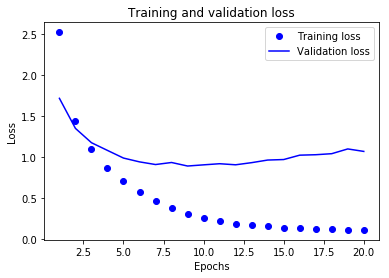

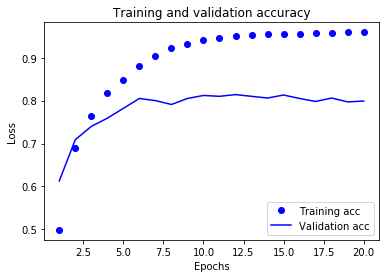

In [20]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 265us/step - loss: 2.5401 - acc: 0.5226 - val_loss: 1.6792 - val_acc: 0.6540
Epoch 2/9
7982/7982 [==============================] - 2s 200us/step - loss: 1.3785 - acc: 0.7096 - val_loss: 1.2825 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 2s 192us/step - loss: 1.0207 - acc: 0.7781 - val_loss: 1.1321 - val_acc: 0.7550
Epoch 4/9
7982/7982 [==============================] - 2s 192us/step - loss: 0.8003 - acc: 0.8257 - val_loss: 1.0532 - val_acc: 0.7580
Epoch 5/9
7982/7982 [==============================] - 2s 195us/step - loss: 0.6392 - acc: 0.8629 - val_loss: 0.9753 - val_acc: 0.7950
Epoch 6/9
7982/7982 [==============================] - 2s 203us/step - loss: 0.5112 - acc: 0.8930 - val_loss: 0.9097 - val_acc: 0.8130
Epoch 7/9
7982/7982 [==============================] - 2s 196us/step - loss: 0.4115 - acc: 0.9141 - val_loss: 0.8913 - val_acc: 0.8240
Epoch 8

[1.0225298075620766, 0.77738201251968353]

In [23]:
predictions = model.predict(x_test)
predictions[0].shape

(46,)

In [24]:
np.sum(predictions[0])

1.0000002

In [25]:
np.argmax(predictions[0])

3

In [27]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = train_labels[:1000]
partial_y_train = train_labels[1000:]

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
model.evaluate(x_test, test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 231us/step - loss: 2.4778 - acc: 0.5266 - val_loss: 1.6351 - val_acc: 0.6450
Epoch 2/9
7982/7982 [==============================] - 1s 184us/step - loss: 1.3444 - acc: 0.7201 - val_loss: 1.2574 - val_acc: 0.7230
Epoch 3/9
7982/7982 [==============================] - 1s 187us/step - loss: 1.0058 - acc: 0.7910 - val_loss: 1.1423 - val_acc: 0.7350
Epoch 4/9
7982/7982 [==============================] - 2s 194us/step - loss: 0.8016 - acc: 0.8294 - val_loss: 1.0146 - val_acc: 0.7880
Epoch 5/9
7982/7982 [==============================] - 2s 191us/step - loss: 0.6361 - acc: 0.8662 - val_loss: 0.9870 - val_acc: 0.8090
Epoch 6/9
7982/7982 [==============================] - 1s 186us/step - loss: 0.5113 - acc: 0.8908 - val_loss: 0.9359 - val_acc: 0.8050
Epoch 7/9
7982/7982 [==============================] - 1s 186us/step - loss: 0.4111 - acc: 0.9109 - val_loss: 0.9236 - val_acc: 0.8010
Epoch 8

[0.97949756837167168, 0.7822796082188801]